# 실습2

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.error import HTTPError
from urllib.error import URLError
import pandas as pd

In [2]:
try :
    html = urlopen('https://www.koreabaseball.com/Record/Player/HitterBasic/Basic1.aspx')
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else :
    soup = BeautifulSoup(html.read(), 'html.parser')

In [3]:
table = soup.find('table', {'class' : 'tData01'})
# table

trs = table.find_all('tr')
# trs

In [4]:
name = []
avg = []
h = []
hr = []
rbi = []

for tr in trs :
    tds = tr.find_all('td')
    
    for td in tds :
        if (td.find('a')) :
            name.append(td.find('a').string)
            avg.append(tds[3].text)
            h.append(tds[8].text)
            hr.append(tds[11].text)
            rbi.append(tds[13].text)

baseballPlayer_df = pd.DataFrame({
    'name' : name,
    'avg' : avg,
    'hit' : h,
    'homerun' : hr,
    'rbi' : rbi
})

baseballPlayer_df.to_csv('baseballPlayer_df.csv', mode = 'w', encoding = 'utf-8')

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./baseballPlayer_df.csv', index_col = 'name', encoding = 'utf-8')
df.head()

,Unnamed: 0,avg,hit,homerun,rbi
name,,,,,
로하스,0,0.351,170,42,119
손아섭,1,0.350,158,9,71
김현수,2,0.346,167,22,111
이정후,3,0.345,170,15,98
페르난데스,4,0.344,176,18,90


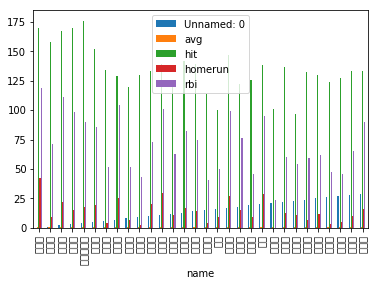

In [7]:
df.plot.bar()